In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

from scipy import stats
from scipy.stats import rankdata, norm
from scipy.stats import ttest_ind
from scipy import stats


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('D:\\Downloads\\code\\code\\Extra-Projects\\4sim\\4sim-gov-ai-mvp\\other\\df_final_features.csv')

In [9]:
df.head(4)

,Name,Sex,Age,Height,Weight,Team,Year,Season,Host_City,Host_Country,...,GDP_Per_Capita_Constant_LCU_Value,Cereal_yield_kg_per_hectare_Value,Military_expenditure_current_LCU_Value,Tax_revenue_current_LCU_Value,Expense_current_LCU_Value,Central_government_debt_total_current_LCU_Value,Representing_Host,Avg_Temp,Medal,Medal_Binary
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Spain,...,6875.676999,4362.3,6.849287e+10,1.605180e+12,7.161170e+12,4.396980e+12,0,6.95,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,United Kingdom,...,41274.127360,5825.2,9.935000e+11,5.524090e+12,7.161170e+12,3.974130e+13,0,6.95,0,0
2,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Canada,...,24946.565910,6194.0,6.035300e+09,5.311044e+10,1.125100e+11,1.441520e+11,0,9.25,0,0
3,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Canada,...,24946.565910,6194.0,6.035300e+09,5.311044e+10,1.125100e+11,1.441520e+11,0,9.25,0,0


In [13]:
print(df.columns)
print(len(df.columns))

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Season',
       'Host_City', 'Host_Country', 'Sport', 'Event',
       'GDP_Per_Capita_Constant_LCU_Value',
       'Cereal_yield_kg_per_hectare_Value',
       'Military_expenditure_current_LCU_Value',
       'Tax_revenue_current_LCU_Value', 'Expense_current_LCU_Value',
       'Central_government_debt_total_current_LCU_Value', 'Representing_Host',
       'Avg_Temp', 'Medal', 'Medal_Binary'],
      dtype='object')
22


In [14]:
df.shape

(202616, 22)

In [15]:
df["Medal_Binary"].unique()

array([0, 1])

In [16]:
df.describe()

,Age,Height,Weight,Year,GDP_Per_Capita_Constant_LCU_Value,Cereal_yield_kg_per_hectare_Value,Military_expenditure_current_LCU_Value,Tax_revenue_current_LCU_Value,Expense_current_LCU_Value,Central_government_debt_total_current_LCU_Value,Representing_Host,Medal,Medal_Binary
count,202616.000000,202615.000000,202615.000000,202616.000000,2.026160e+05,202616.000000,2.026160e+05,2.026160e+05,2.026160e+05,2.026160e+05,202616.000000,202616.000000,202616.000000
mean,24.966480,175.298414,70.576962,1992.252626,1.016396e+06,3815.762734,9.349333e+11,5.332783e+12,8.412407e+12,2.874933e+13,0.057977,0.268345,0.134752
std,5.472054,10.483912,14.263095,16.518691,5.839650e+06,1949.234610,8.936899e+12,3.156301e+13,4.994614e+13,1.226608e+14,0.233700,0.743768,0.341460
min,11.000000,127.000000,25.000000,1960.000000,2.321763e+02,150.700000,0.000000e+00,5.454545e-01,8.363636e-01,6.489720e+01,0.000000,0.000000,0.000000
25%,21.000000,168.000000,60.000000,1980.000000,1.671118e+04,2181.500000,2.090000e+09,2.922448e+10,4.695430e+10,2.558440e+11,0.000000,0.000000,0.000000
50%,24.000000,175.000000,70.000000,1996.000000,3.046682e+04,3542.300000,1.603750e+10,1.548900e+11,2.276600e+11,2.207460e+12,0.000000,0.000000,0.000000
75%,28.000000,182.000000,79.000000,2006.000000,1.329136e+05,5353.000000,6.637900e+10,6.510000e+11,1.101240e+12,6.174150e+12,0.000000,0.000000,0.000000
max,71.000000,226.000000,214.000000,2016.000000,1.313372e+08,25878.800000,3.782240e+14,1.280000e+15,1.840000e+15,3.890000e+15,1.000000,3.000000,1.000000


In [17]:
feature_summary = pd.DataFrame({
    'missing_rate': df.isna().mean(),
    'unique_values': df.nunique(),
    'dtype': df.dtypes
})

In [18]:
print(feature_summary)

                                                 missing_rate  unique_values  \
Name                                                 0.000000         100178   
Sex                                                  0.000000              2   
Age                                                  0.000000            231   
Height                                               0.000005            492   
Weight                                               0.000005            631   
Team                                                 0.000000            203   
Year                                                 0.000000             21   
Season                                               0.000000              2   
Host_City                                            0.000000             29   
Host_Country                                         0.000000             18   
Sport                                                0.000000             51   
Event                                   

<Axes: >

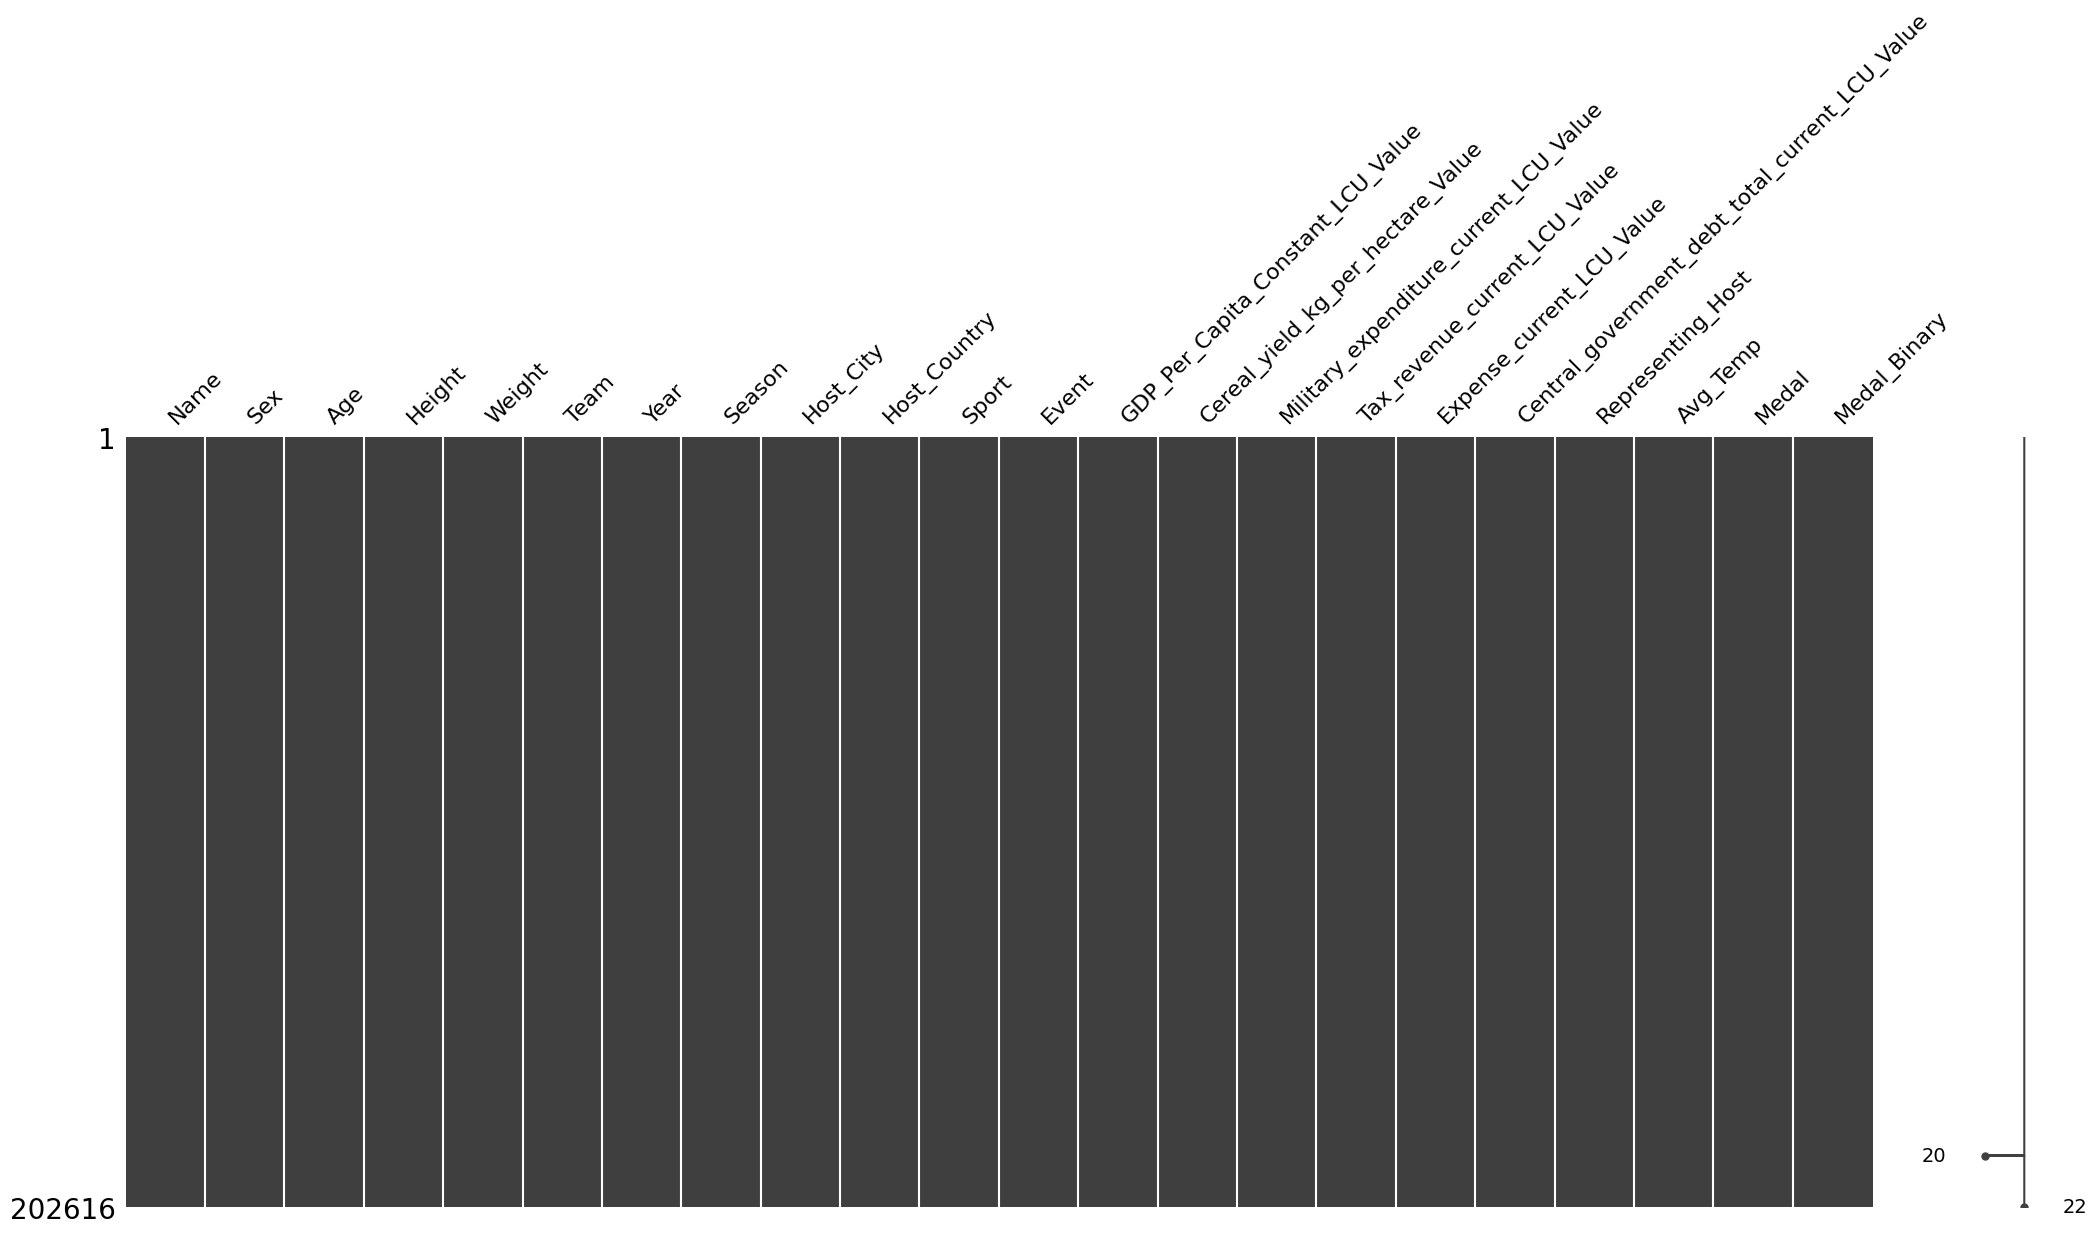

In [19]:
msno.matrix(df)

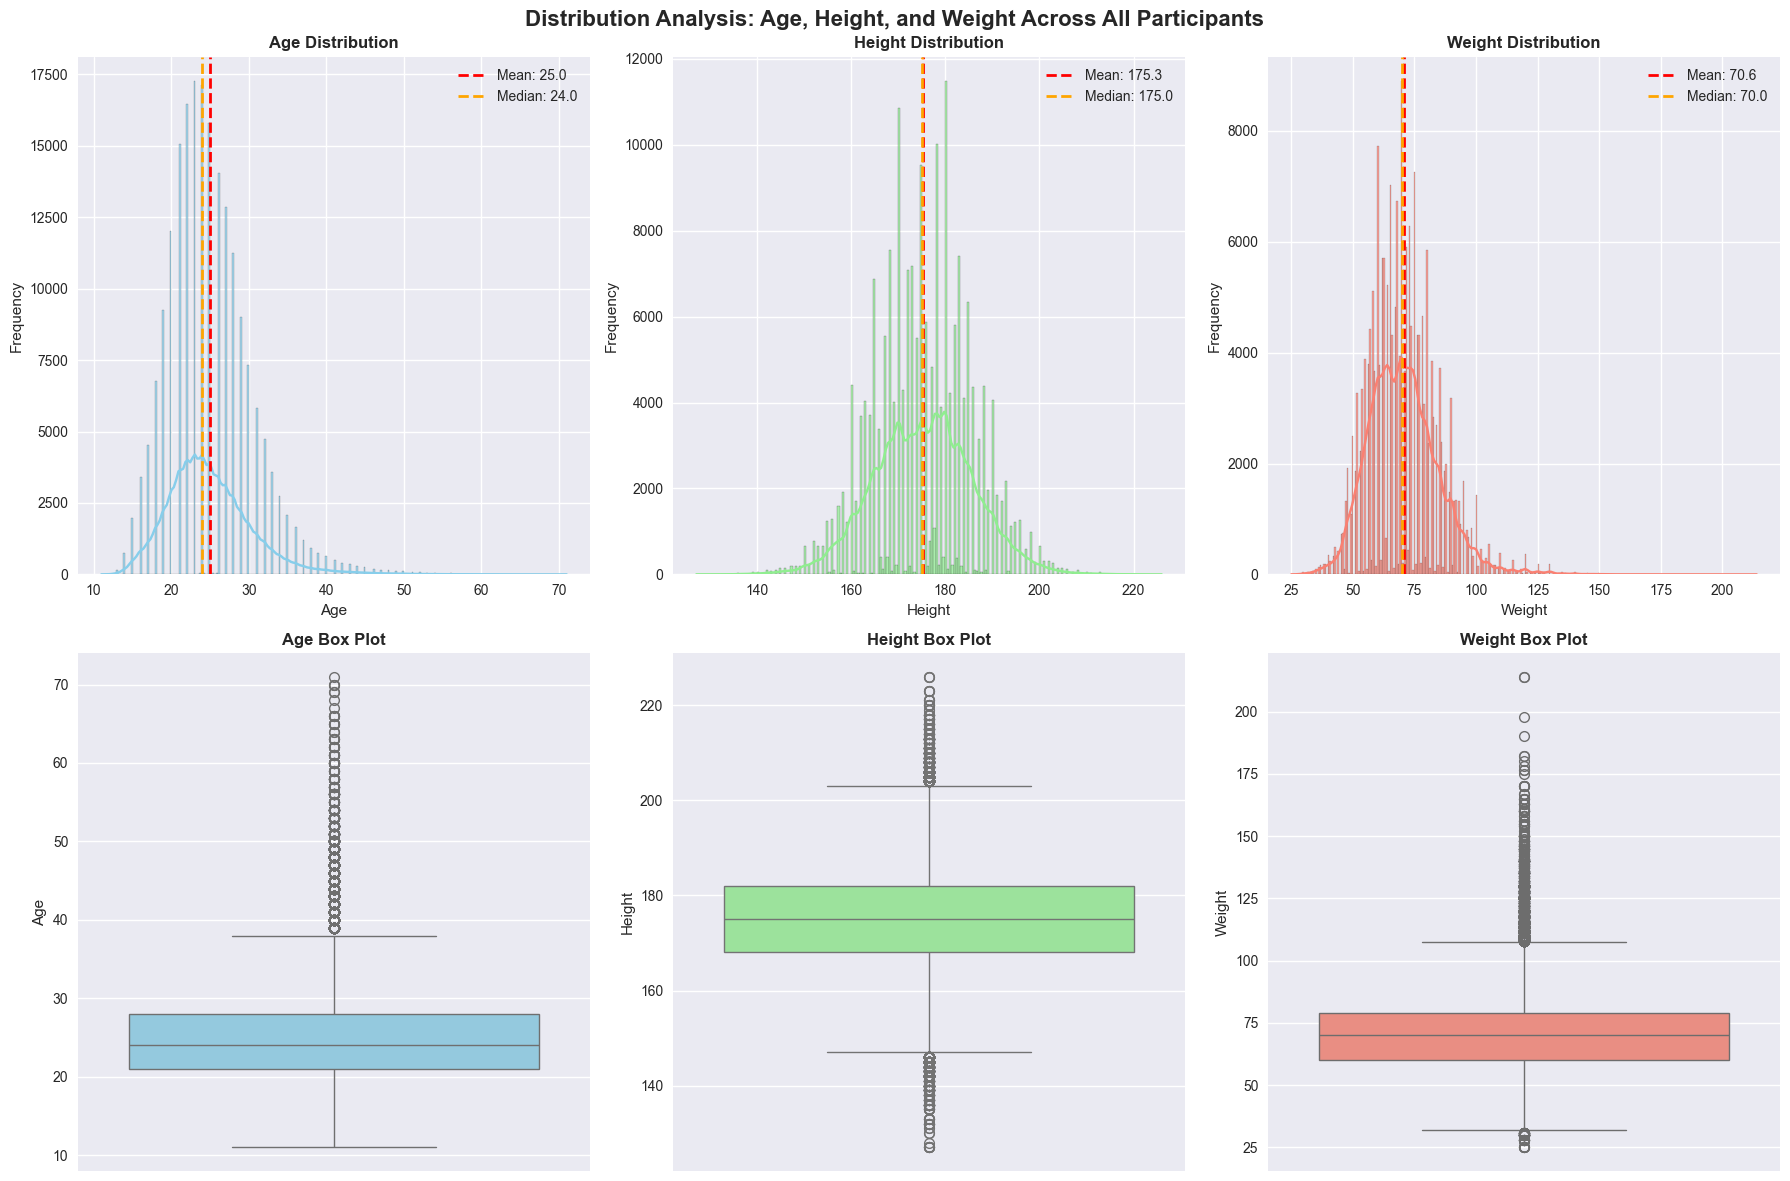

SUMMARY STATISTICS FOR AGE, HEIGHT, AND WEIGHT

AGE STATISTICS:
----------------------------------------
Count: 202,616
Mean: 24.97
Std: 5.47
Min: 11.00
25%: 21.00
50% (Median): 24.00
75%: 28.00
Max: 71.00
Skewness: 1.111
Kurtosis: 3.013
Missing values: 0

HEIGHT STATISTICS:
----------------------------------------
Count: 202,615
Mean: 175.30
Std: 10.48
Min: 127.00
25%: 168.00
50% (Median): 175.00
75%: 182.00
Max: 226.00
Skewness: 0.005
Kurtosis: 0.182
Missing values: 1

WEIGHT STATISTICS:
----------------------------------------
Count: 202,615
Mean: 70.58
Std: 14.26
Min: 25.00
25%: 60.00
50% (Median): 70.00
75%: 79.00
Max: 214.00
Skewness: 0.785
Kurtosis: 2.039
Missing values: 1


In [20]:
# Distribution Analysis of Age, Height, and Weight across all participants

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a figure with subplots for the three variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Analysis: Age, Height, and Weight Across All Participants', 
             fontsize=16, fontweight='bold')

# Variables to analyze
variables = ['Age', 'Height', 'Weight']
colors = ['skyblue', 'lightgreen', 'salmon']

# 1. Histograms with KDE
for i, var in enumerate(variables):
    # Histogram with KDE
    sns.histplot(data=df, x=var, kde=True, ax=axes[0, i], color=colors[i], alpha=0.7)
    axes[0, i].set_title(f'{var} Distribution', fontweight='bold')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[0, i].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[0, i].legend()

# 2. Box plots
for i, var in enumerate(variables):
    sns.boxplot(data=df, y=var, ax=axes[1, i], color=colors[i])
    axes[1, i].set_title(f'{var} Box Plot', fontweight='bold')
    axes[1, i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 80)
print("SUMMARY STATISTICS FOR AGE, HEIGHT, AND WEIGHT")
print("=" * 80)

for var in variables:
    print(f"\n{var.upper()} STATISTICS:")
    print("-" * 40)
    stats = df[var].describe()
    print(f"Count: {stats['count']:,.0f}")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Std: {stats['std']:.2f}")
    print(f"Min: {stats['min']:.2f}")
    print(f"25%: {stats['25%']:.2f}")
    print(f"50% (Median): {stats['50%']:.2f}")
    print(f"75%: {stats['75%']:.2f}")
    print(f"Max: {stats['max']:.2f}")
    
    # Additional statistics
    print(f"Skewness: {df[var].skew():.3f}")
    print(f"Kurtosis: {df[var].kurtosis():.3f}")
    print(f"Missing values: {df[var].isna().sum()}")

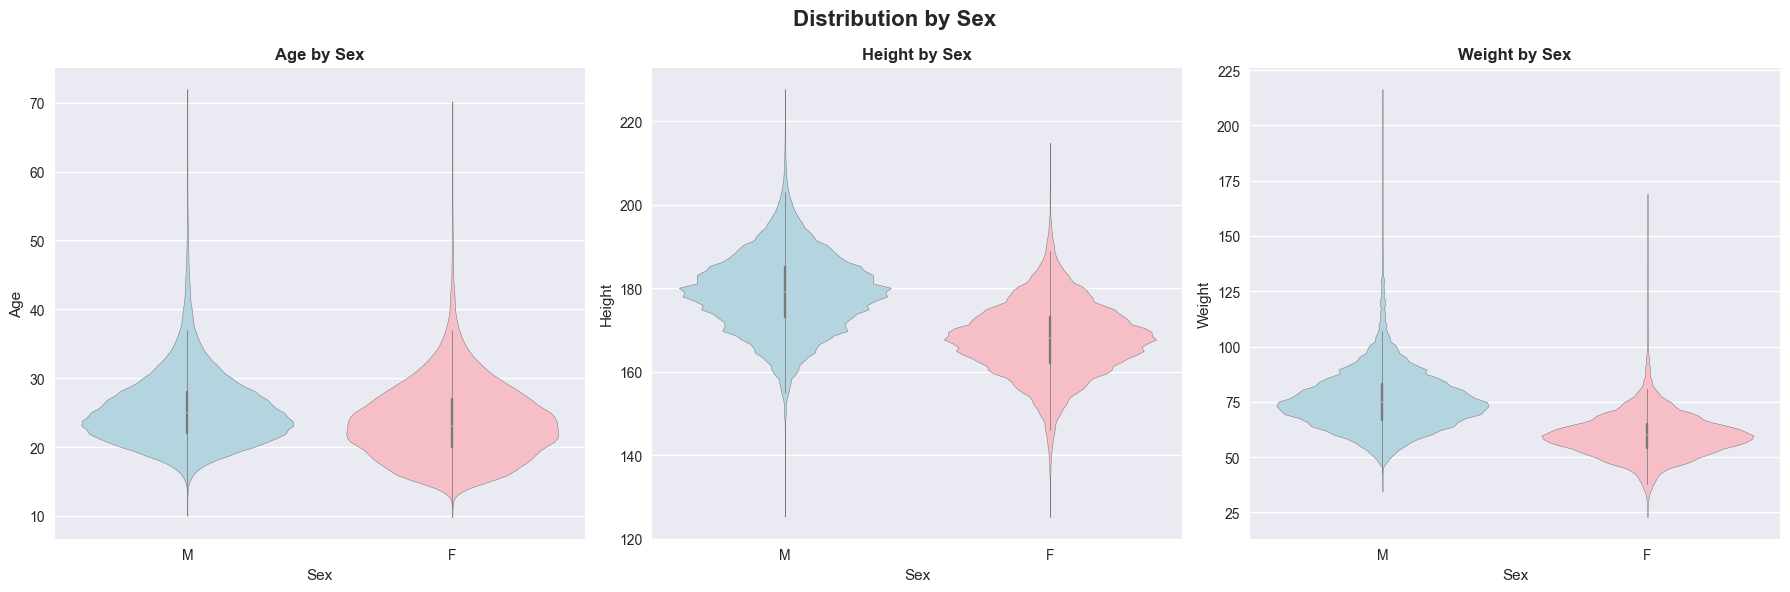

STATISTICS BY SEX

AGE BY SEX:
----------------------------------------
        count       mean       std   min   25%   50%   75%   max
Sex                                                             
F     67485.0  23.738259  5.563850  11.0  20.0  23.0  27.0  69.0
M    135131.0  25.579859  5.320532  11.0  22.0  25.0  28.0  71.0

T-test for difference between sexes:
T-statistic: 72.314
P-value: 0.000000
Significant difference: Yes

HEIGHT BY SEX:
----------------------------------------
        count        mean       std    min    25%    50%    75%    max
Sex                                                                   
F     67484.0  167.865602  8.679406  127.0  162.0  168.0  173.0  213.0
M    135131.0  179.010337  9.263569  127.0  173.0  179.0  185.0  226.0

T-test for difference between sexes:
T-statistic: 260.587
P-value: 0.000000
Significant difference: Yes

WEIGHT BY SEX:
----------------------------------------
        count       mean        std   min   25%   50%   75%  

In [23]:
from scipy.stats import ttest_ind

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution by Sex', fontsize=16, fontweight='bold')

for i, var in enumerate(variables):
    # Create violin plot
    sns.violinplot(data=df, x='Sex', y=var, ax=axes[i], hue='Sex', palette=['lightblue', 'lightpink'], legend=False)
    axes[i].set_title(f'{var} by Sex', fontweight='bold')
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Print statistics by sex
print("=" * 80)
print("STATISTICS BY SEX")
print("=" * 80)

for var in variables:
    print(f"\n{var.upper()} BY SEX:")
    print("-" * 40)
    sex_stats = df.groupby('Sex')[var].describe()
    print(sex_stats)
    
    # Statistical test for difference between sexes
    male_data = df[df['Sex'] == 'M'][var].dropna()
    female_data = df[df['Sex'] == 'F'][var].dropna()
    
    if len(male_data) > 0 and len(female_data) > 0:
        # Perform t-test
        t_stat, p_value = ttest_ind(male_data, female_data)
        print(f"\nT-test for difference between sexes:")
        print(f"T-statistic: {t_stat:.3f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

C:\Users\muzaf\AppData\Local\Temp\ipykernel_8224\227605927.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sport_data, x='Sport', y=var, ax=axes[i], palette='Set3')
C:\Users\muzaf\AppData\Local\Temp\ipykernel_8224\227605927.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sport_data, x='Sport', y=var, ax=axes[i], palette='Set3')
C:\Users\muzaf\AppData\Local\Temp\ipykernel_8224\227605927.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sport_data, x='Sport', y=var, ax=axes[i], palette='Set3')


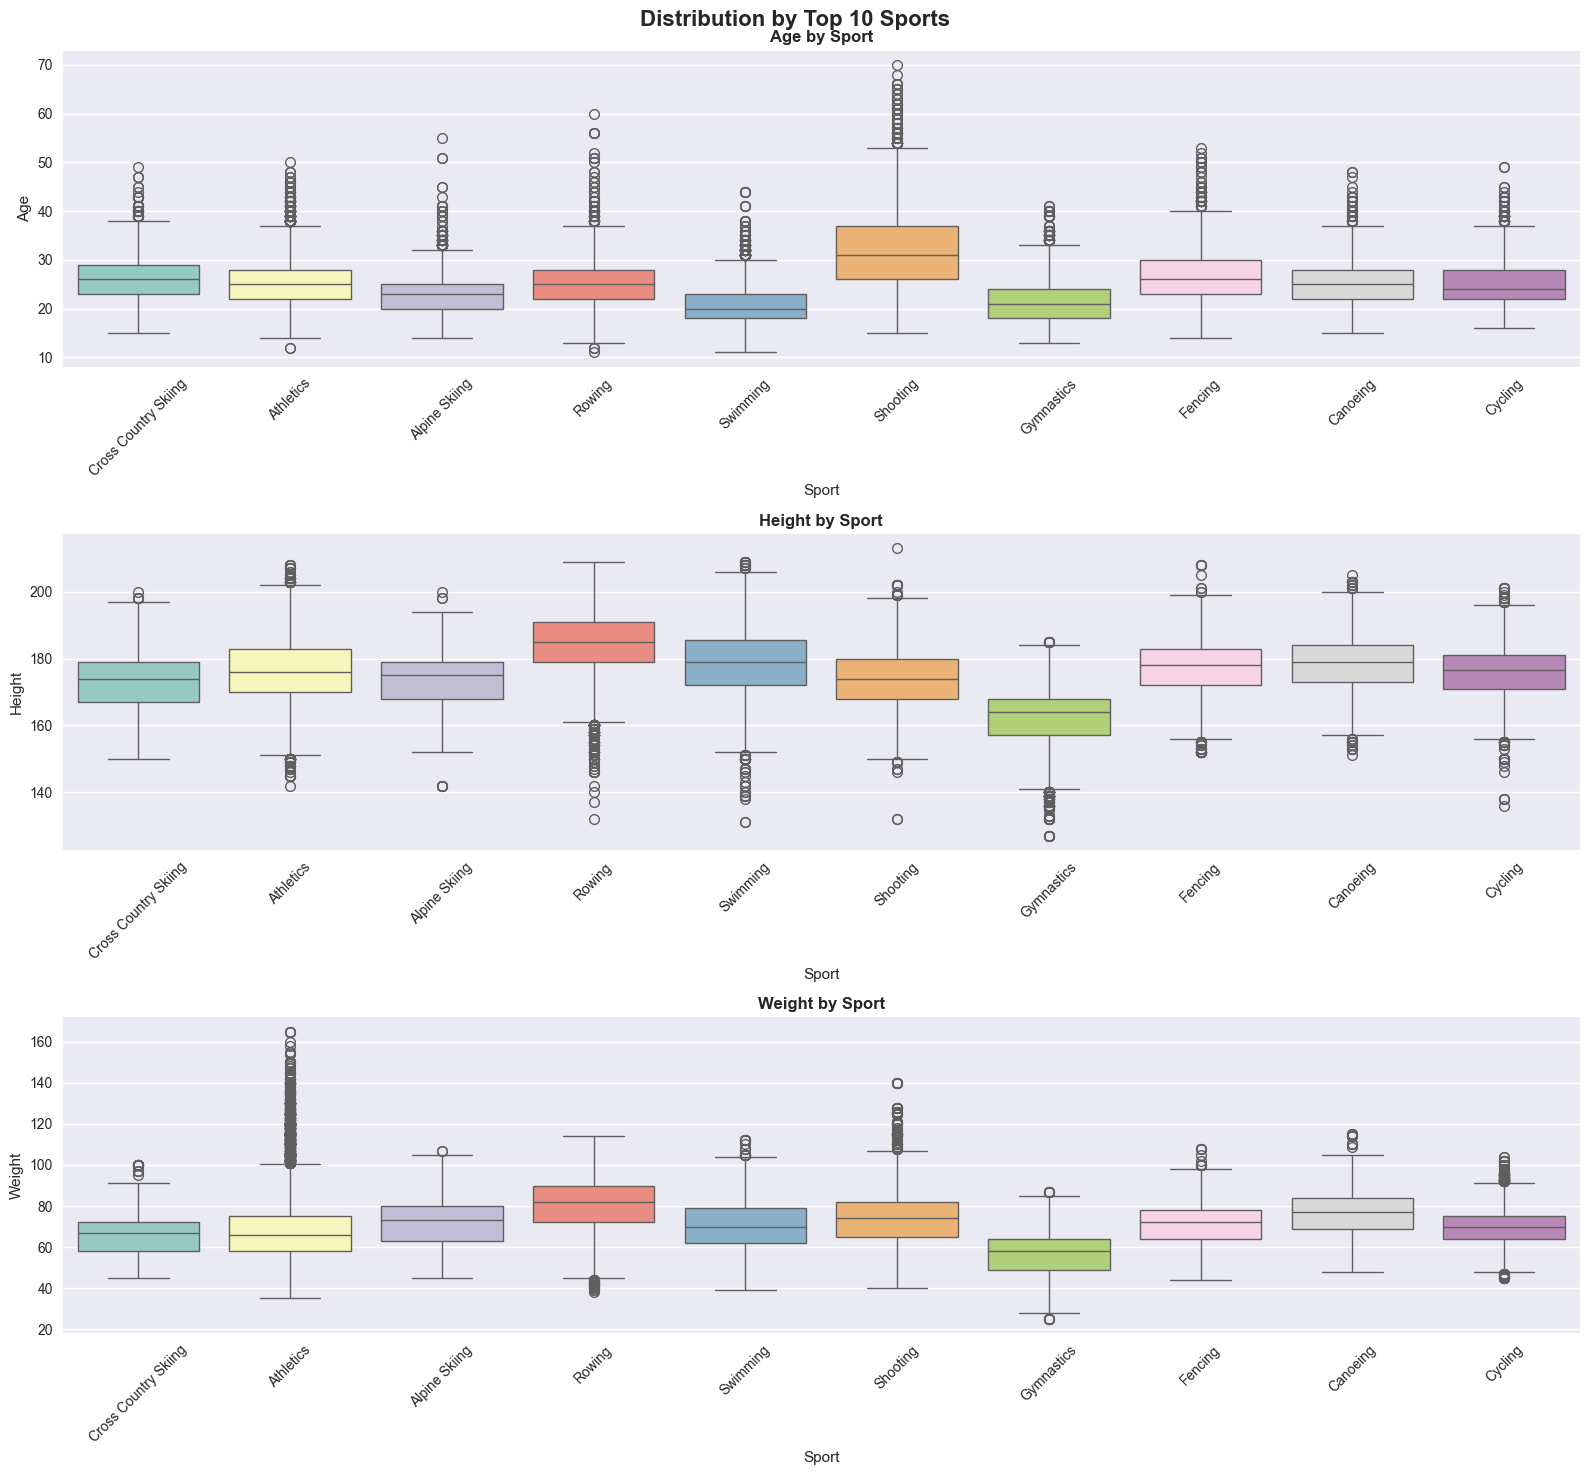

STATISTICS BY TOP 10 SPORTS

AGE BY SPORT (Top 10):
--------------------------------------------------
                      count   mean   std   min   max
Sport                                               
Alpine Skiing          7343  23.14  4.01  14.0  55.0
Athletics             27555  25.44  4.41  12.0  50.0
Canoeing               5344  25.41  4.46  15.0  48.0
Cross Country Skiing   7777  26.03  4.33  15.0  49.0
Cycling                7727  25.18  4.52  16.0  49.0
Fencing                6272  26.68  5.09  14.0  53.0
Gymnastics            17223  21.49  4.27  13.0  41.0
Rowing                 7514  25.45  4.33  11.0  60.0
Shooting               7077  32.08  8.12  15.0  70.0
Swimming              19703  20.56  3.72  11.0  44.0

HEIGHT BY SPORT (Top 10):
--------------------------------------------------
                      count    mean   std    min    max
Sport                                                  
Alpine Skiing          7343  173.75  7.47  142.0  200.0
Athletics      

In [24]:
# Distribution by Sport (Top 10 sports by participant count)
top_sports = df['Sport'].value_counts().head(10).index

fig, axes = plt.subplots(3, 1, figsize=(16, 15))
fig.suptitle('Distribution by Top 10 Sports', fontsize=16, fontweight='bold')

for i, var in enumerate(variables):
    # Filter data for top sports
    sport_data = df[df['Sport'].isin(top_sports)]
    
    # Create box plot
    sns.boxplot(data=sport_data, x='Sport', y=var, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{var} by Sport', fontweight='bold')
    axes[i].set_xlabel('Sport')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics for top sports
print("=" * 80)
print("STATISTICS BY TOP 10 SPORTS")
print("=" * 80)

for var in variables:
    print(f"\n{var.upper()} BY SPORT (Top 10):")
    print("-" * 50)
    sport_stats = df[df['Sport'].isin(top_sports)].groupby('Sport')[var].agg(['count', 'mean', 'std', 'min', 'max'])
    print(sport_stats.round(2))

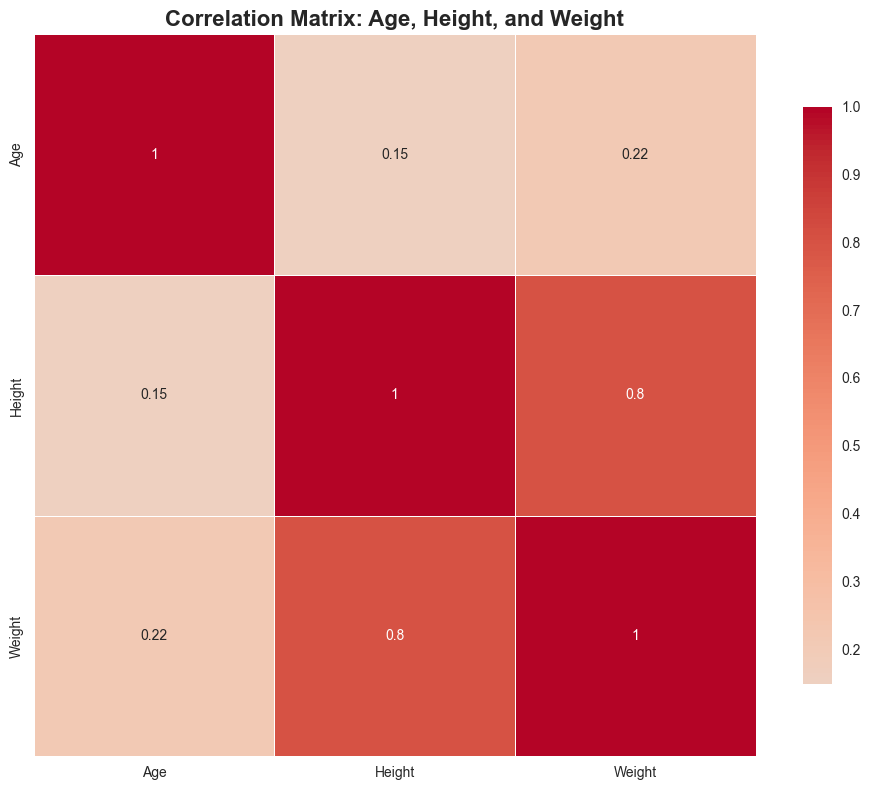

CORRELATION ANALYSIS

Correlation Matrix:
          Age  Height  Weight
Age     1.000   0.149   0.216
Height  0.149   1.000   0.799
Weight  0.216   0.799   1.000


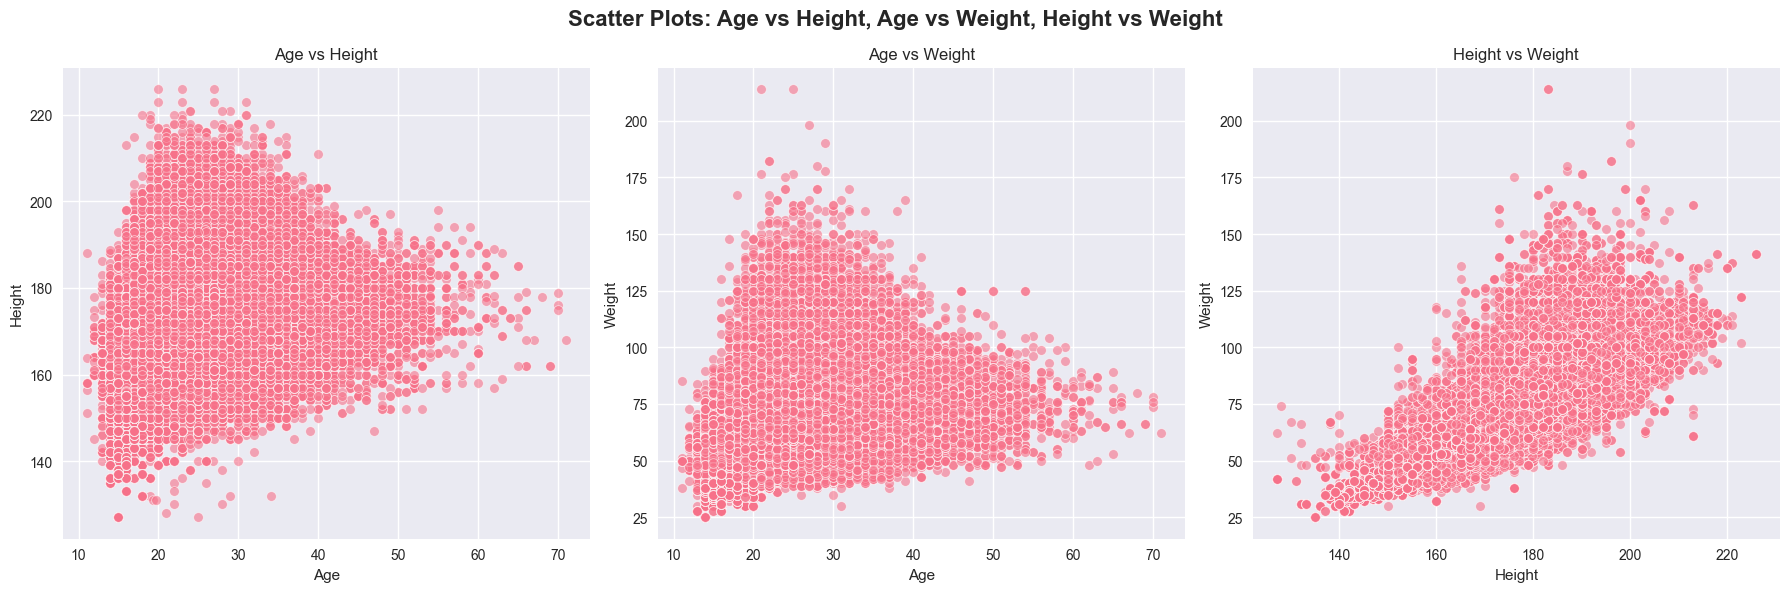

In [25]:
# Correlation analysis between Age, Height, and Weight
correlation_vars = ['Age', 'Height', 'Weight']
correlation_matrix = df[correlation_vars].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Age, Height, and Weight', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlation details
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Scatter plot matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Scatter Plots: Age vs Height, Age vs Weight, Height vs Weight', 
             fontsize=16, fontweight='bold')

# Age vs Height
sns.scatterplot(data=df, x='Age', y='Height', alpha=0.6, ax=axes[0])
axes[0].set_title('Age vs Height')

# Age vs Weight
sns.scatterplot(data=df, x='Age', y='Weight', alpha=0.6, ax=axes[1])
axes[1].set_title('Age vs Weight')

# Height vs Weight
sns.scatterplot(data=df, x='Height', y='Weight', alpha=0.6, ax=axes[2])
axes[2].set_title('Height vs Weight')

plt.tight_layout()
plt.show()


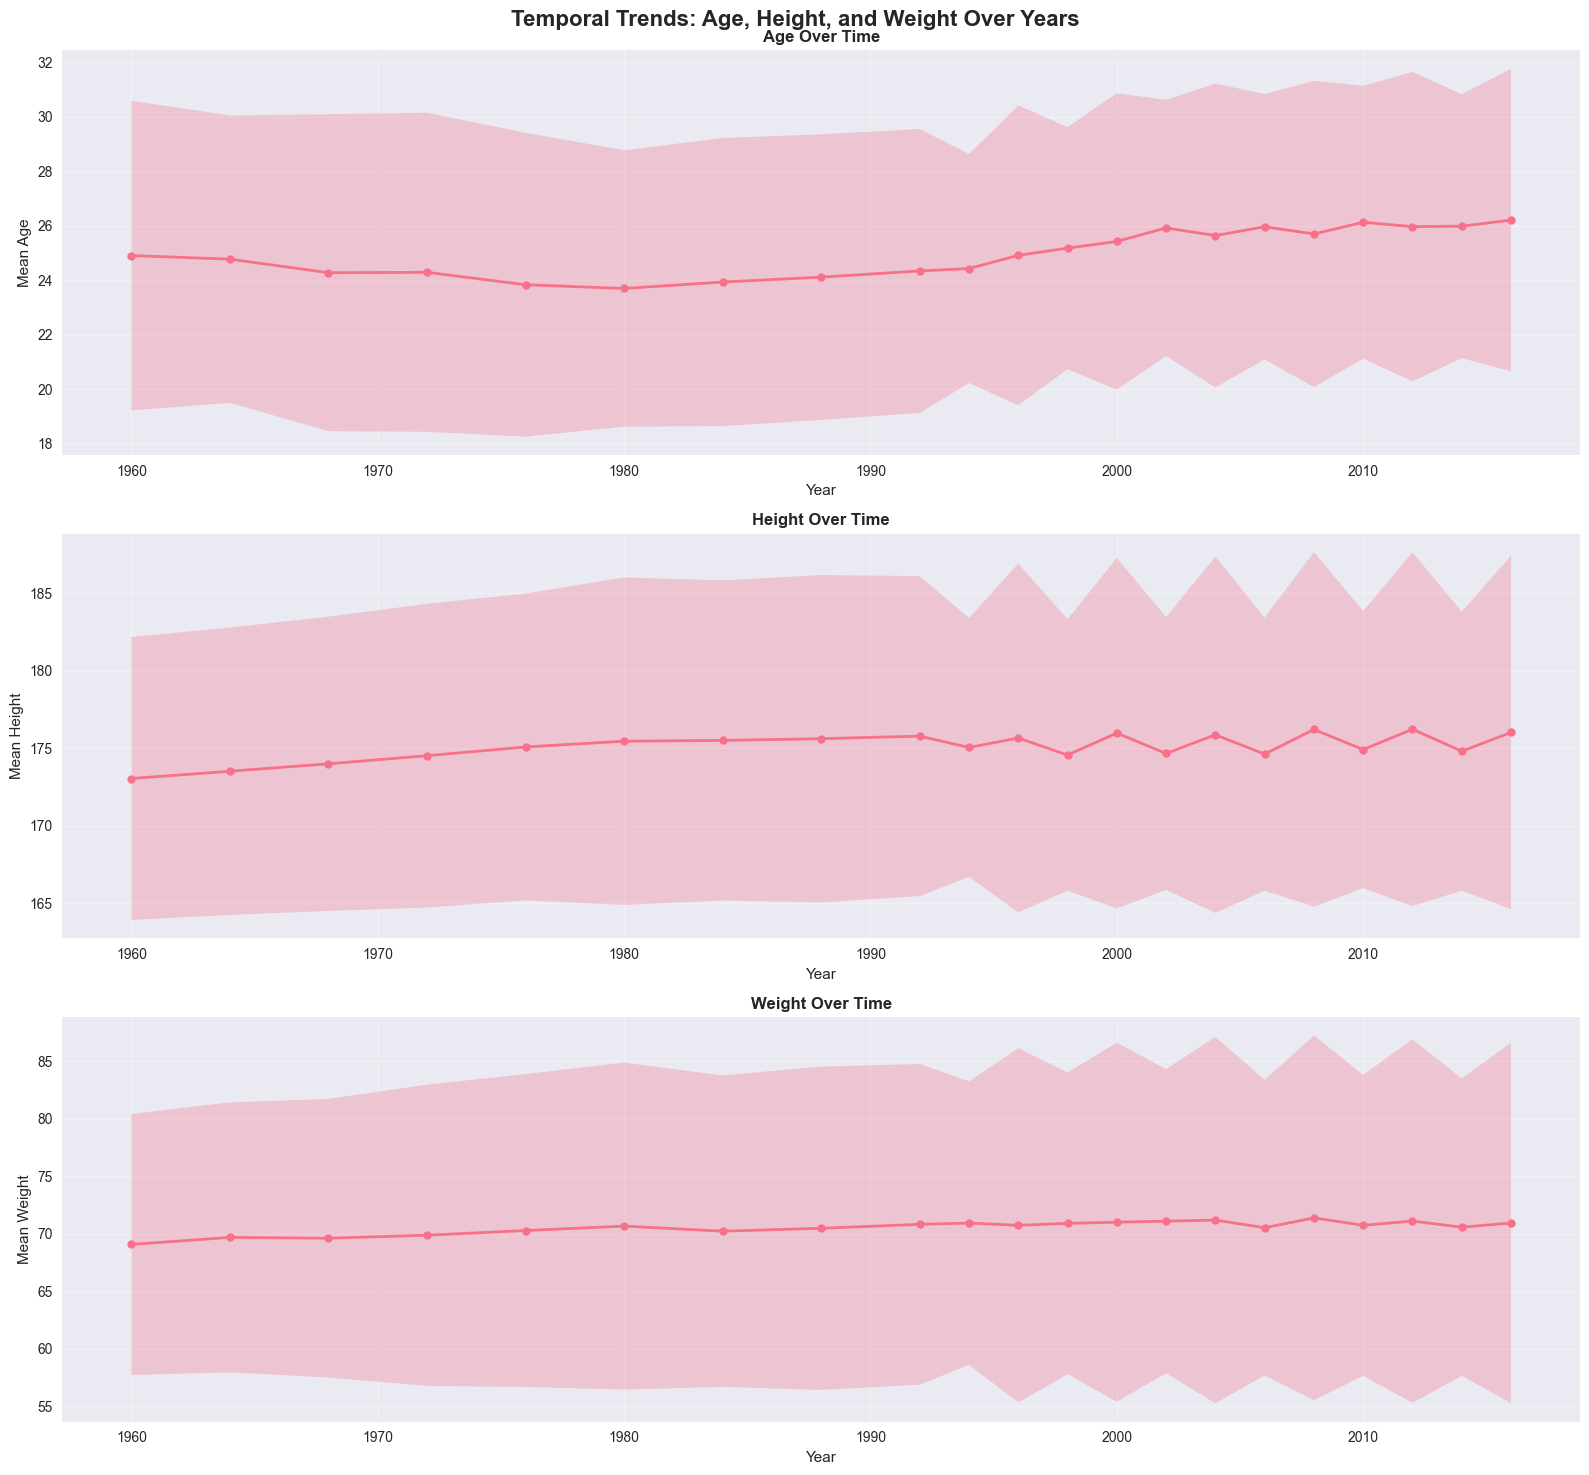

TEMPORAL TRENDS ANALYSIS

AGE TEMPORAL TRENDS:
----------------------------------------
       mean   std  count
Year                    
1960  24.91  5.69   8418
1964  24.77  5.28   8853
1968  24.28  5.82  10024
1972  24.29  5.86  11379
1976  23.83  5.58  10021
1980  23.70  5.07   8339
1984  23.93  5.29  11227
1988  24.11  5.24  14084
1992  24.34  5.21  14988
1994  24.43  4.20   3160
1996  24.91  5.50  13675
1998  25.18  4.45   3600
2000  25.42  5.44  13667
2002  25.92  4.71   4097
2004  25.64  5.58  13327
2006  25.96  4.87   4366
2008  25.70  5.63  13554
2010  26.13  5.01   4398
2012  25.97  5.68  12903
2014  25.99  4.85   4884
2016  26.21  5.55  13652

Linear trend analysis:
Slope: 0.038254 (change per year)
R-squared: 0.013
P-value: 0.000000
Trend direction: Increasing

HEIGHT TEMPORAL TRENDS:
----------------------------------------
        mean    std  count
Year                      
1960  173.05   9.13   8418
1964  173.52   9.28   8853
1968  174.00   9.50  10024
1972  174.52   

In [27]:
from scipy import stats

# Assuming `df` is your DataFrame and `variables` is a list of column names (e.g., ['Age', 'Height', 'Weight'])

fig, axes = plt.subplots(3, 1, figsize=(16, 15))
fig.suptitle('Temporal Trends: Age, Height, and Weight Over Years', fontsize=16, fontweight='bold')

for i, var in enumerate(variables):
    # Calculate mean by year
    yearly_stats = df.groupby('Year')[var].agg(['mean', 'std', 'count']).reset_index()
    
    # Plot mean with confidence interval
    axes[i].plot(yearly_stats['Year'], yearly_stats['mean'], marker='o', linewidth=2, markersize=6)
    axes[i].fill_between(yearly_stats['Year'], 
                         yearly_stats['mean'] - yearly_stats['std'],
                         yearly_stats['mean'] + yearly_stats['std'], 
                         alpha=0.3)
    axes[i].set_title(f'{var} Over Time', fontweight='bold')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'Mean {var}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print temporal statistics
print("=" * 80)
print("TEMPORAL TRENDS ANALYSIS")
print("=" * 80)

for var in variables:
    print(f"\n{var.upper()} TEMPORAL TRENDS:")
    print("-" * 40)
    yearly_stats = df.groupby('Year')[var].agg(['mean', 'std', 'count']).round(2)
    print(yearly_stats)
    
    # Calculate trend (simple linear regression)
    years = df['Year'].values.reshape(-1, 1)
    values = df[var].values
    
    # Remove NaN values
    mask = ~np.isnan(values)
    if np.sum(mask) > 1:
        years_clean = years[mask]
        values_clean = values[mask]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(years_clean.flatten(), values_clean)
        print(f"\nLinear trend analysis:")
        print(f"Slope: {slope:.6f} (change per year)")
        print(f"R-squared: {r_value**2:.3f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Trend direction: {'Increasing' if slope > 0 else 'Decreasing'}")


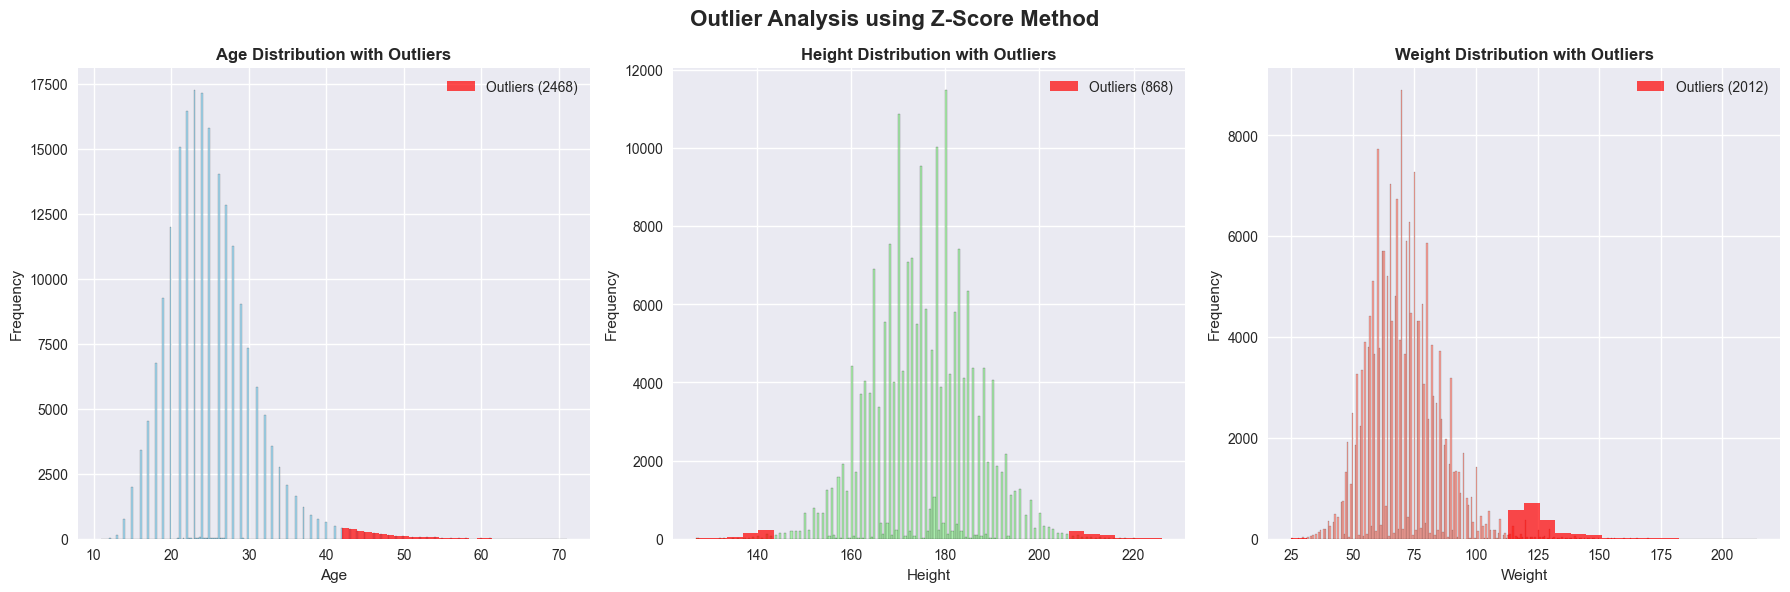

OUTLIER ANALYSIS

AGE OUTLIER ANALYSIS:
----------------------------------------
Z-score outliers (>3 std): 2468 (1.22%)
IQR outliers: 4385 (2.16%)
Z-score outlier range: 42.00 - 71.00
IQR outlier range: 39.00 - 71.00

HEIGHT OUTLIER ANALYSIS:
----------------------------------------
Z-score outliers (>3 std): 868 (0.43%)
IQR outliers: 1699 (0.84%)
Z-score outlier range: 127.00 - 226.00
IQR outlier range: 127.00 - 226.00

WEIGHT OUTLIER ANALYSIS:
----------------------------------------
Z-score outliers (>3 std): 2012 (0.99%)
IQR outliers: 3017 (1.49%)
Z-score outlier range: 25.00 - 214.00
IQR outlier range: 25.00 - 214.00


In [28]:
# Outlier analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Outlier Analysis using Z-Score Method', fontsize=16, fontweight='bold')

for i, var in enumerate(variables):
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df[var].dropna()))
    
    # Identify outliers (z-score > 3)
    outliers = df[var].dropna()[z_scores > 3]
    
    # Create histogram with outliers highlighted
    sns.histplot(data=df, x=var, ax=axes[i], color=colors[i], alpha=0.7)
    
    # Highlight outliers
    if len(outliers) > 0:
        axes[i].hist(outliers, bins=30, color='red', alpha=0.7, label=f'Outliers ({len(outliers)})')
        axes[i].legend()
    
    axes[i].set_title(f'{var} Distribution with Outliers', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print outlier statistics
print("=" * 80)
print("OUTLIER ANALYSIS")
print("=" * 80)

for var in variables:
    print(f"\n{var.upper()} OUTLIER ANALYSIS:")
    print("-" * 40)
    
    # Z-score method
    z_scores = np.abs(stats.zscore(df[var].dropna()))
    outliers_z = df[var].dropna()[z_scores > 3]
    
    # IQR method
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[var][(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    print(f"Z-score outliers (>3 std): {len(outliers_z)} ({len(outliers_z)/len(df[var].dropna())*100:.2f}%)")
    print(f"IQR outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(df[var].dropna())*100:.2f}%)")
    
    if len(outliers_z) > 0:
        print(f"Z-score outlier range: {outliers_z.min():.2f} - {outliers_z.max():.2f}")
    if len(outliers_iqr) > 0:
        print(f"IQR outlier range: {outliers_iqr.min():.2f} - {outliers_iqr.max():.2f}")